# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

In [ ]:
#Answer: Ability to predict which free customers will convert to paying customers based upon demographic and 
#customer useage data. 

#### 2. What are the predictors/covariates? 

In [ ]:
#Answer: Demographic data (age, gender, location, and profession) as well as customer usage data 
#(days since last log in and activity score).  

#### 3. What timeframe is this data relevent for?

In [ ]:
#Answer: January to April 2015.

#### 4. What is the hypothesis?

In [ ]:
#Answer: If a free-tier customer is an active user, they are more likely to become a paying customer.

## Let's get started with our dataset

#### 1. Create a data dictionary 

|Variable|Description|Type of Variable|
|---|---|---|
|Var 1 | 0 = not thing 1 = thing | categorical|
|Var 2 | thing in unit X | continuous|

|Variable | Description | Type of Variable|
|---| ---| ---|
|admit | either 0 (not admitted) or 1 (admitted) | categorical|
|gre | scores ranges from 130–170 | integer|
|gpa | grade point average, range of 0 - 4.0 | continuous|
|prestige | school rank from 1 - 4 with 1 being highest and 4 being the lowest | ordinal|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

path = "../assets/admissions.csv"
df = pd.read_csv(path) 

In [2]:
import matplotlib.pyplot as plt

In [3]:
#getting the first five rows of the data

df.head() 

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [31]:
#determining data types

df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [4]:
#getting a count for each row. Any row not equal to 400 means there are null values.

df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
#getting the shape of the dataframe > tuple (rows by columns) 

df.shape

(400, 4)

In [6]:
df.describe()

admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

In [7]:
#below creates a new data frame that has dropped the null values
df2 = df.dropna() 

#df.dropna(inplace = True) > this overwrites the original dataframe 

In [8]:
#testing for collinearity

df2.corr()

admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000

In [9]:
#getting a description of new dataframe without null values

df2.describe() 

admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

In [10]:
#below taking the new dataframe (df2) with has omitted the null values and re-naming it dfAdmit
#then getting a description of df2

dfAdmit = df2[ df2.admit == 1 ]

#below is how you determine variability
#cp = dfAdmit.gre.mean()/dfAdmit.gre.std()
#print cp

greAdmit = dfAdmit.gre

cp = greAdmit.mean()/greAdmit.std() 

print round(cp,1) 
#above is how you round

dfAdmit.describe() 



5.7


admit         gre         gpa    prestige
count  126.0  126.000000  126.000000  126.000000
mean     1.0  618.571429    3.489206    2.150794
std      0.0  109.257233    0.371655    0.921455
min      1.0  300.000000    2.420000    1.000000
25%      1.0  540.000000    3.220000    1.000000
50%      1.0  620.000000    3.545000    2.000000
75%      1.0  680.000000    3.757500    3.000000
max      1.0  800.000000    4.000000    4.000000

In [11]:
#creating a new dataframe of people who were not admitted 

dfNotAdmit = df2[ df2.admit == 0 ]

#greForNoAdmit = dfNotAdmit.gre > re-name the column and can use it below so you're not running the same column 2x
#we don't need to bring in the whole column twice
#cpNotAdmit = greForNoAdmit.mean()/greForNoAdmit.std() > this is an optimization on what's below

#how you determine variability > always compare vs. mean
cpNotAdmit = dfNotAdmit.gre.mean()/dfNotAdmit.gre.std()
print round(cpNotAdmit,1)

dfNotAdmit.describe() 

4.9


admit         gre         gpa    prestige
count  271.0  271.000000  271.000000  271.000000
mean     0.0  573.579336    3.347159    2.645756
std      0.0  116.052798    0.376355    0.918922
min      0.0  220.000000    2.260000    1.000000
25%      0.0  500.000000    3.080000    2.000000
50%      0.0  580.000000    3.340000    3.000000
75%      0.0  660.000000    3.610000    3.000000
max      0.0  800.000000    4.000000    4.000000

In [12]:
#below is for practice as above, I re-named the dataframe df2 in order to remove the null values

df[ df.admit ==1].describe()

admit         gre         gpa    prestige
count  127.0  127.000000  126.000000  126.000000
mean     1.0  618.897638    3.489206    2.150794
std      0.0  108.884884    0.371655    0.921455
min      1.0  300.000000    2.420000    1.000000
25%      1.0  540.000000    3.220000    1.000000
50%      1.0  620.000000    3.545000    2.000000
75%      1.0  680.000000    3.757500    3.000000
max      1.0  800.000000    4.000000    4.000000

In [36]:
df2.corr() 

admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000

We would like to explore the association between X and Y 

In [ ]:
# X = admit and Y = GRE.

#Does a higher GRE score mean the person is  more likely to be admitted?

#### 2. What is the outcome?

In [ ]:
#Answer: You can use dataframe.corr in order to determine the correlation in the data. See above. 

#Outcome: The higher the GRE score, the more likely a person is to be admitted. 

#### 3. What are the predictors/covariates? 

In [13]:
#Answer: GRE, GPA, and Prestige.

#### 4. What timeframe is this data relevent for?

In [14]:
#Answer: There is no timeframe provided for this dataset. 

#### 4. What is the hypothesis?

In [15]:
#Answer: Based upon the mean of both datasets, it appears that GRE is a better predictor of acceptance than GPA.

    Using the above information, write a well-formed problem statement. 


In [ ]:
#Answer: Based upon admissions data, students who scored at least 618 points on their GRE were more likely to be admitted than those students who had lower scores.

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

In [16]:
#Answer: Understand the size, shape, and range of the data.

#First step was to create df2 which removed the null values from the original dataframe(name: df) 
#below gives you the first five rows of the dataframe

df2.head() 

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [17]:
#below gives various summary statistics of your dataframe

df2.describe() 

admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

#### 2a. What are the assumptions of the distribution of data? 

Answer:

In [18]:
print df2.skew()
print df2.kurt() 

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64
admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


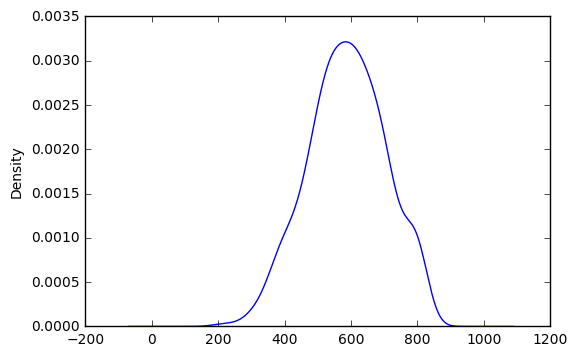

-0.146046988216
-0.332864354651


In [19]:
df2.gre.plot(kind = "density") 
plt.show() 

print df2.gre.skew() 

print df2.gre.kurt() 

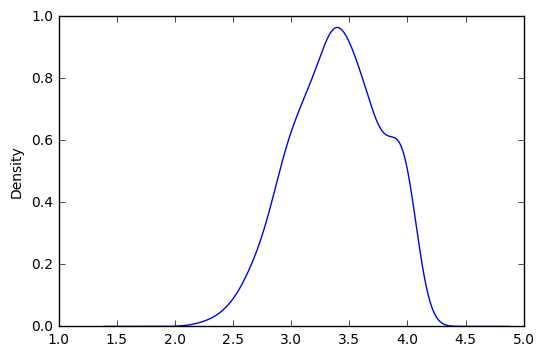

-0.216888932969
-0.563569899522


In [21]:
df2.gpa.plot(kind = "density") 
plt.show() 

print df2.gpa.skew() 
print df2.gpa.kurt() 

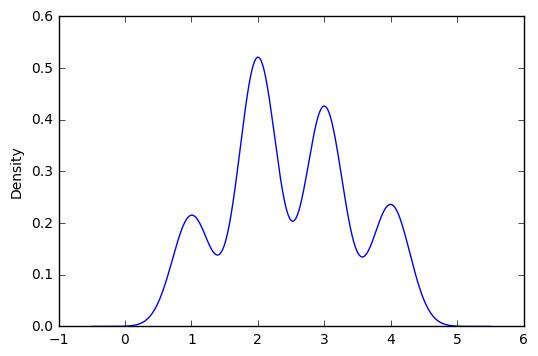

0.0865055528971
-0.90103795489


In [22]:
df2.prestige.plot(kind = "density") 
plt.show() 

print df2.prestige.skew() 

print df2.prestige.kurt() 

#### 2b. How will determine the distribution of your data? 

In [ ]:
#Answer: See density plots above for each column.

#### 3a. How might outliers impact your analysis? 

In [ ]:
#Answer: Outliers have the biggest effect on the mean (not as much on the median or mode).
#Outlers cause the data to be biased towards them.

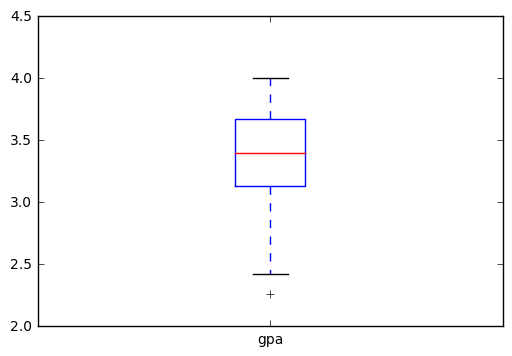

In [45]:
df2.gpa.plot.box(ylim = (2.0, 4.5))   

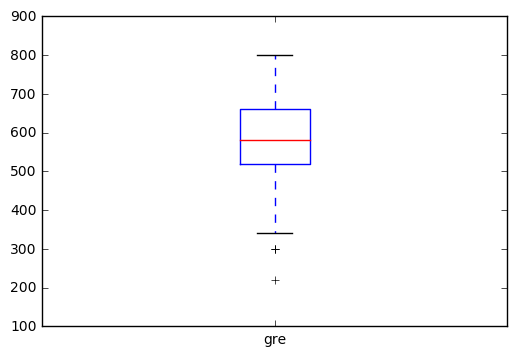

In [41]:
df2.gre.plot.box(ylim = (100, 900))  

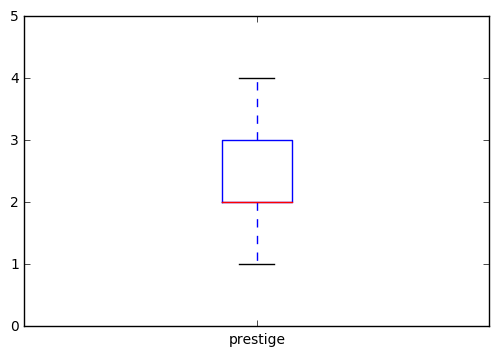

In [39]:
df2.prestige.plot.box(ylim = (0,5))  

#### 3b. How will you test for outliers? 

Answer:

In [ ]:
#See box plots above. 

#### 4a. What is colinearity? 

In [ ]:
#Answer: Collinearity is predictors that are correlated with other predictors.

#-1 <- correlation <= 1
#-1 => highly negative correlated
#1 => positive correlated
#0 => no correlation
#-1 <=  correlation <= 1

#### 4b. How will you test for colinearity? 

In [ ]:
#Answer: Utilize the scatterplots below in order to compare gre vs. gpa, prestige vs. gre, and prestige vs. gpa

#Also, above used df2.corr() 

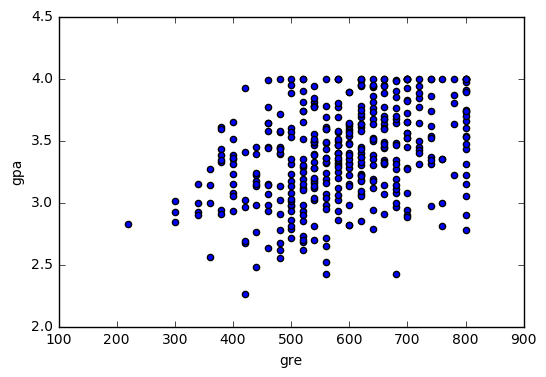

In [32]:
#df.plot.scatter(x='a', y='b');

df2.plot.scatter(x = 'gre', y = 'gpa') 

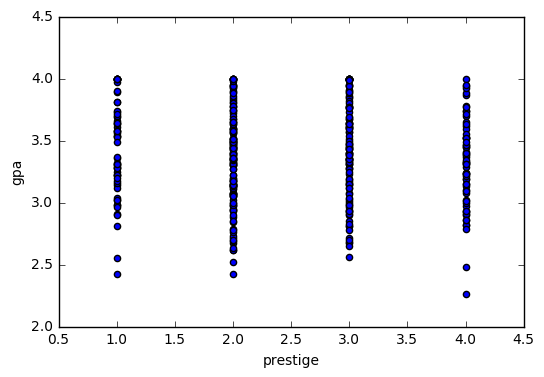

In [33]:
df2.plot.scatter(x = 'prestige', y = 'gpa')

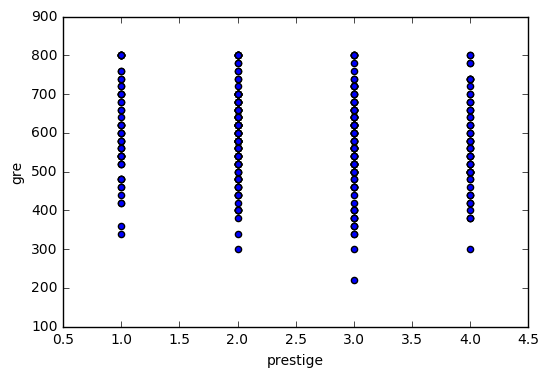

In [34]:
df2.plot.scatter(x = 'prestige', y = 'gre')

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

In [ ]:
#Answer: With new data, we would start by cleaning it in order to review null values in order to have a more accurate comparison of the data.
#We would then run an exploratory analysis on the new data as I did on the data above. 
#This exploratory analysis would allow us to summarize and plot the data so that any trends, outliers, etc. can be seen with the new data set.
#Once all of the exploratory work is done on the new data set, the two data sets - 'old' and 'new' - can then be compared.
#The comparison of 'old' and 'new' will allow you to determine if there's any correlation in the data between admissions cycles or if each admissions cycle presents a unique set of data.

In [ ]:
## Bonus Questions:
#1. Outline your analysis method for predicting your outcome
#2. Write an alternative problem statement for your dataset
#3. Articulate the assumptions and risks of the alternative model

In [ ]:
#Bonus Questions Answers:

#1: My analysis method was that I first cleaned the data by removing null values.
#I think summarized the data utilizing .describe() and .corr() as well as getting the head for column names.
#Once I created my new dataframe - which was a subset of the original data minus the null values to prevent skewedness in my data due to null values.
#I was able to begin graphing and plotting it to determine trends, where the tail was - right or left, see if there were any outliers, etc.


#2 Alternative Problem Statement: The schools with a prestige in the middle of the range (1 (best) to 4 (worst)) were more likely to see their students admitted.

#3 Assumptions and Risks: My problem statement above does not factor in GPA or GRE. These students may have had higher GPAs and higher GRE scores which is why they were accepted. I am making the assumption that school rank impacted acceptance. 